In [1]:
from tracetools_analysis.ros_model import ApplicationFactory

In [2]:
trace_path = '~/.ros/tracing/e2e_demo1/ust'
#trace_path = '~/.ros/tracing/standalong_demo/ust'
architecture_path = '../architecture1.json'
architecture_path_template = '../architecture1.json.template'

In [3]:
app = ApplicationFactory.create_from_json(architecture_path)

In [4]:
app.import_trace(trace_path)

converting trace directory: /home/zs/.ros/tracing/e2e_demo1/ust
converted 1933 events in 92 ms
output written to: /home/zs/.ros/tracing/e2e_demo1/ust/converted
 [99%] [Ros2Handler]


In [5]:
print(app.callbacks[2].get_info())

{'type': 'subscribe_callback', 'topic_name': '/topic1', 'symbol': 'NoDependencyNode::NoDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}'}


In [6]:
callback = app.callbacks[2]

In [7]:
import matplotlib.pyplot as plt

In [8]:
callback.get_stats()

{'unit': 'ms',
 'min': 10.076882999999999,
 'max': 10.207953,
 'median': 10.174762999999999,
 'mean': 10.159016935897435}

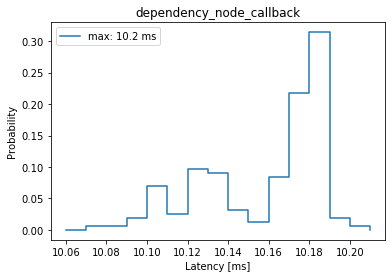

In [9]:
# 柱状图步长为10000ns
hist = callback.hist(binsize_ns=10000)
latency_ms, hist = hist.get_xy()
max_ms = callback.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.title(callback.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')
plt.legend()

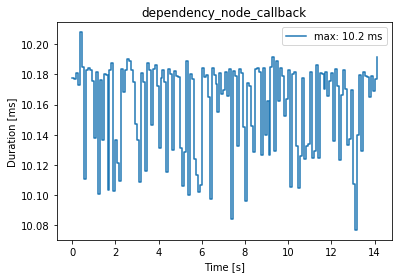

In [10]:
system_time_ns, duration_ns = callback.timeseries.get_xy()
time_s = (system_time_ns - system_time_ns[0]) * 1.0e-9
duration_ms = duration_ns * 1.0e-6
plt.step(time_s, duration_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.title(callback.name)
plt.xlabel('Time [s]')
plt.ylabel('Duration [ms]')
plt.legend()

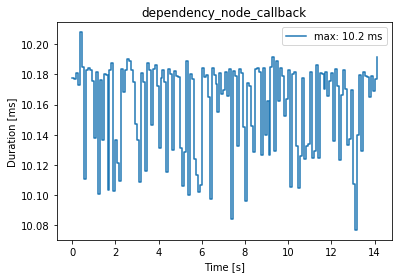

In [11]:
system_time_ns, duration_ns = callback.timeseries.get_xy()
time_s = (system_time_ns - system_time_ns[0]) * 1.0e-9
duration_ms = duration_ns * 1.0e-6
plt.step(time_s, duration_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.title(callback.name)
plt.xlabel('Time [s]')
plt.ylabel('Duration [ms]')
plt.legend()

156
156
-109
109


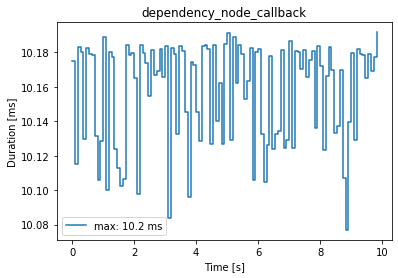

In [12]:
# 截断timeseries
# class Timeseries: def __init__(self, raw: np.array, time: np.array, clock=None):
system_time_ns, duration_ns = callback.timeseries.get_xy()
print(system_time_ns.size)
print(duration_ns.size)
# 取后70%
remain_num = -1*(int)(0.7*system_time_ns.size)
print(remain_num)
cut_system_time_ns = system_time_ns[remain_num: ]
cut_duration_ns = duration_ns[remain_num: ]
print(cut_system_time_ns.size)

cut_time_s = (cut_system_time_ns - cut_system_time_ns[0]) * 1.0e-9
cut_duration_ms = cut_duration_ns * 1.0e-6
plt.step(cut_time_s, cut_duration_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.title(callback.name)
plt.xlabel('Time [s]')
plt.ylabel('Duration [ms]')
plt.legend()